Image Inverse

To compute the inverse of an image, you simply subtract each pixel's intensity value from the maximum intensity value. For an 8-bit grayscale image, the maximum intensity value is 255. The formula for inversion is:

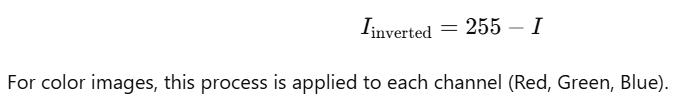

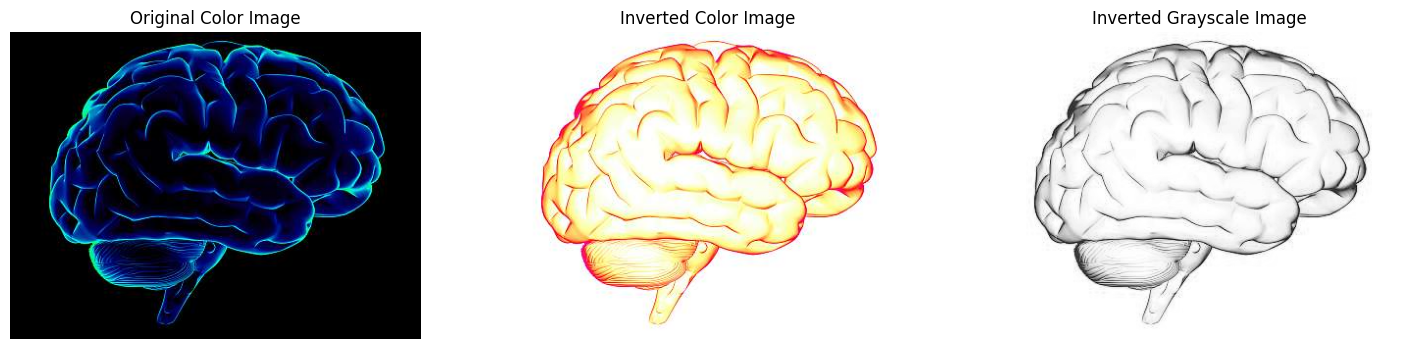

Inverted images saved successfully!


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = 'brain.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale (optional, if you want to invert a grayscale image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image
inverted_gray = 255 - gray_image

# Invert the color image
inverted_color = 255 - image

# Display the original and inverted images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original color image
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Color Image")
ax[0].axis('off')

# Inverted color image
ax[1].imshow(cv2.cvtColor(inverted_color, cv2.COLOR_BGR2RGB))
ax[1].set_title("Inverted Color Image")
ax[1].axis('off')

# Inverted grayscale image
ax[2].imshow(inverted_gray, cmap='gray')
ax[2].set_title("Inverted Grayscale Image")
ax[2].axis('off')

plt.show()

# Save the inverted images
cv2.imwrite('inverted_color_brain.jpg', inverted_color)
cv2.imwrite('inverted_gray_brain.jpg', inverted_gray)

print("Inverted images saved successfully!")


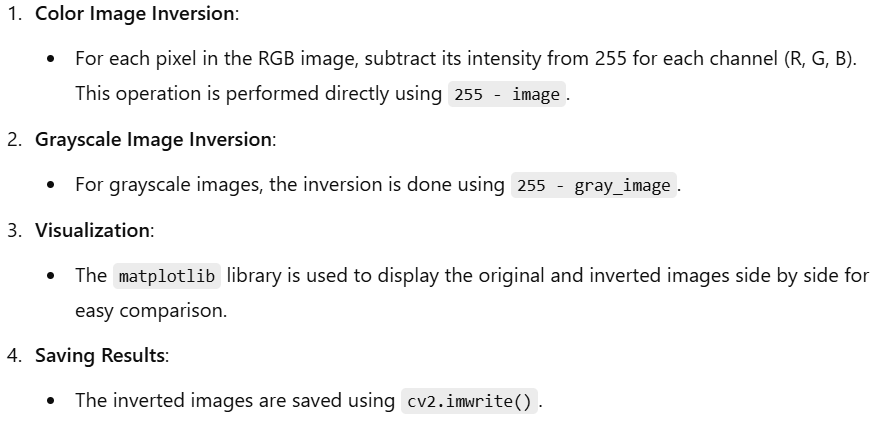

Inverted Color Image: The colors in the image are inverted; lighter colors become darker and vice versa.

Inverted Grayscale Image: The intensity levels are inverted; darker areas become lighter and lighter areas become darker.

Power Law Transformation

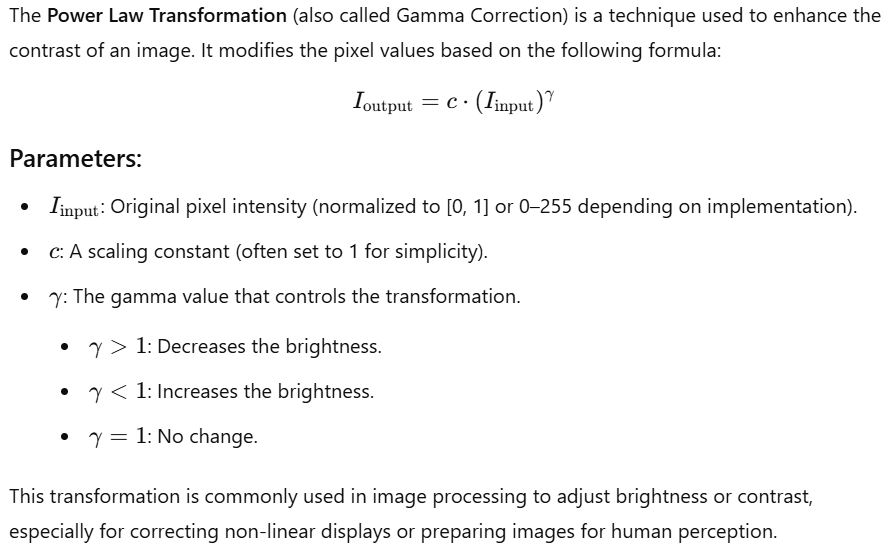

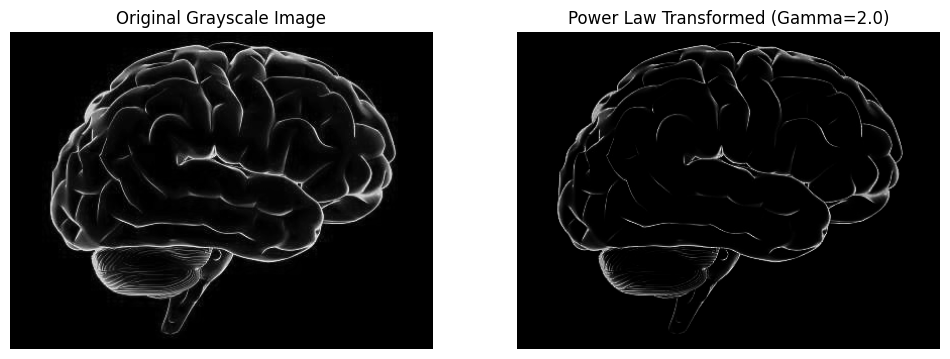

Power law transformed image saved successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'brain.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the grayscale image to the range [0, 1] for transformation
normalized_gray = gray_image / 255.0

# Apply Power Law Transformation (Gamma Correction)
gamma = 2.0  # Change this value to adjust brightness (e.g., 0.5, 1.0, 2.0)
c = 1  # Scaling constant
power_law_transformed = c * (normalized_gray ** gamma)

# Scale back to [0, 255] for visualization and save
power_law_transformed_255 = np.uint8(power_law_transformed * 255)

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# Power law transformed image
ax[1].imshow(power_law_transformed_255, cmap='gray')
ax[1].set_title(f"Power Law Transformed (Gamma={gamma})")
ax[1].axis('off')

plt.show()

# Save the transformed image
cv2.imwrite('power_law_brain.jpg', power_law_transformed_255)

print("Power law transformed image saved successfully!")

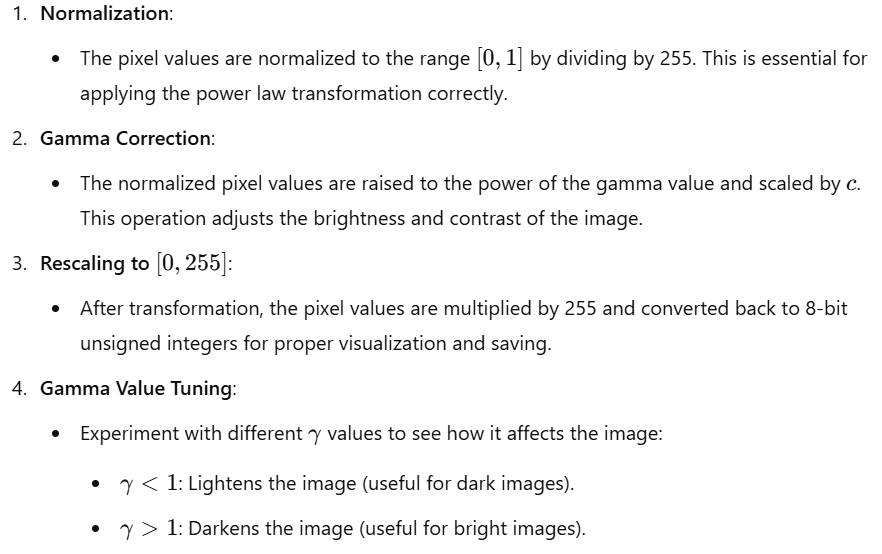

Use Cases:

Image Enhancement: Adjust brightness and contrast to improve image visibility.

Gamma Correction: Compensate for non-linear behavior in display devices.

Preprocessing: Prepare images for tasks like segmentation or object detection by normalizing lighting conditions.

Results:

Gamma < 1: Highlights details in darker regions.

Gamma > 1: Suppresses overexposed areas by enhancing darker tones.

Gamma = 1: No effect; image remains unchanged.

Log Transformation

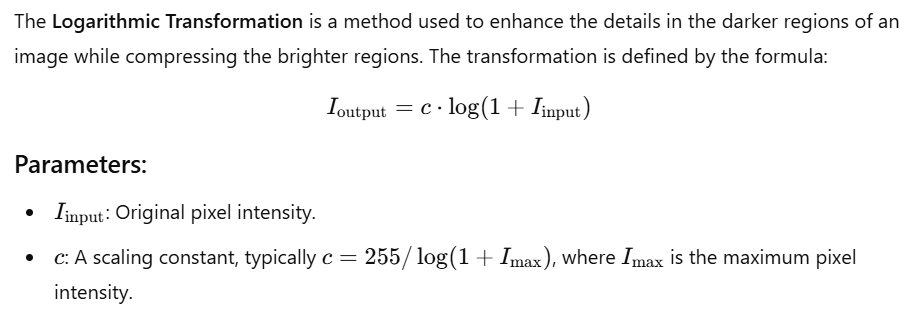

Purpose:

Enhances low-intensity pixel values, making details in darker regions more visible.

Compresses the dynamic range of an image with high-intensity pixels.

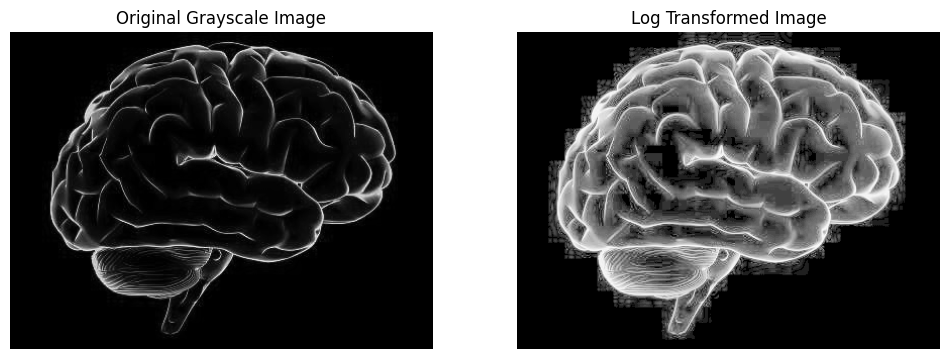

Log transformed image saved successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'brain.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Log Transformation
c = 255 / np.log(1 + np.max(gray_image))  # Scaling constant
log_transformed = c * np.log(1 + gray_image)

# Convert back to uint8 for visualization
log_transformed_255 = np.uint8(log_transformed)

# Display the original and log-transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# Log-transformed image
ax[1].imshow(log_transformed_255, cmap='gray')
ax[1].set_title("Log Transformed Image")
ax[1].axis('off')

plt.show()

# Save the log-transformed image
cv2.imwrite('log_transformed_brain.jpg', log_transformed_255)

print("Log transformed image saved successfully!")


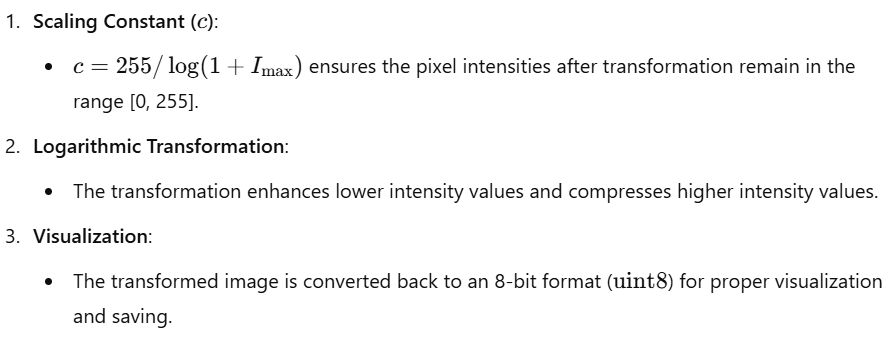

Use Cases:

Low-Light Image Enhancement:

Enhances visibility in darker regions of an image, making hidden details more apparent.

Dynamic Range Compression:

Useful when an image has a high dynamic range and needs to be displayed on devices with lower range.

Results:

Darker Regions: Intensities are amplified to reveal details.

Brighter Regions: Intensities are compressed to prevent oversaturation.

Histogram Equalization

Histogram Equalization is a technique in image processing used to improve the contrast of an image. It redistributes the pixel intensity values to span the entire intensity range, resulting in a more uniform histogram. This is particularly useful for images with low contrast.

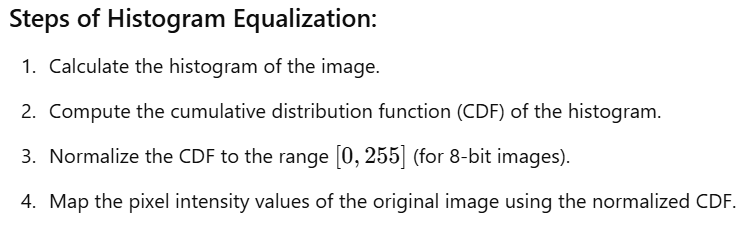

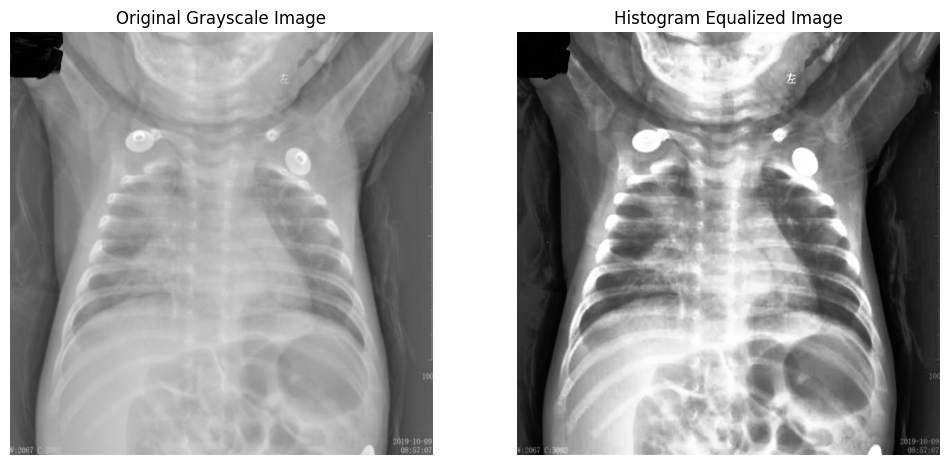

Histogram equalized image saved successfully!


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = 'chest.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# Equalized grayscale image
ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title("Histogram Equalized Image")
ax[1].axis('off')

plt.show()

# Save the equalized image
cv2.imwrite('equalized_chest.png', equalized_image)

print("Histogram equalized image saved successfully!")


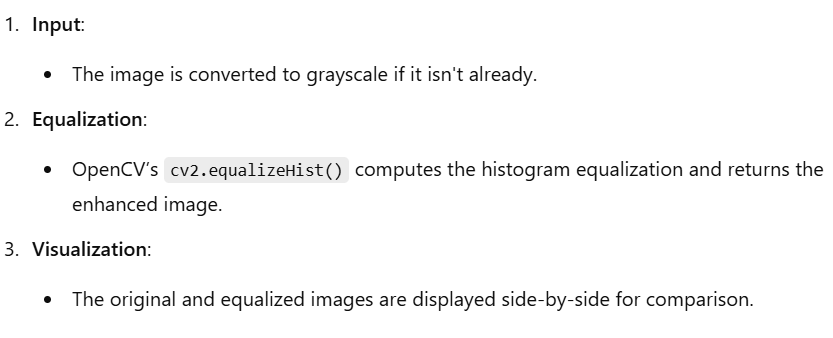

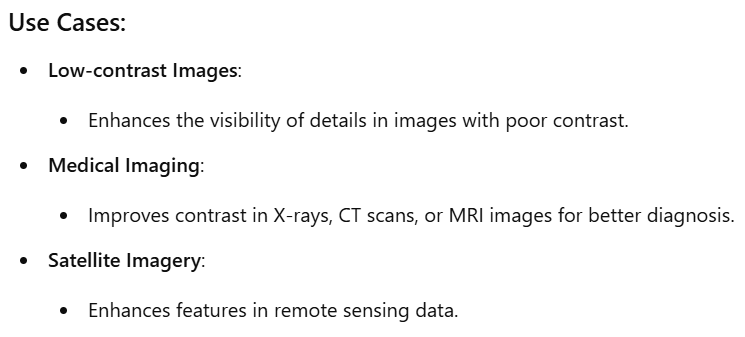

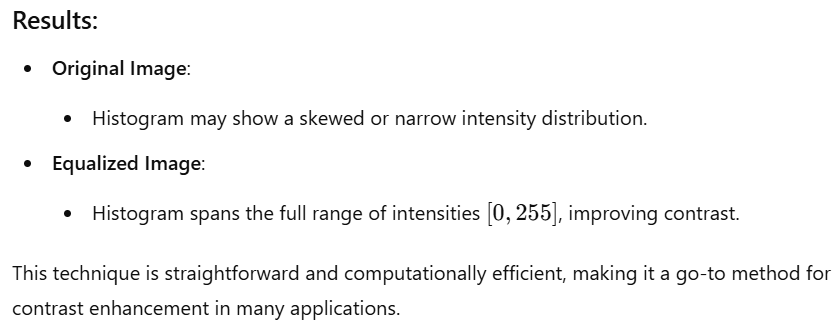

Contrast Limited Adaptive Histogram Equalization (CLAHE)

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an advanced version of histogram equalization designed to enhance image contrast adaptively, particularly for regions with varying brightness. It limits the amplification of noise and avoids over-enhancement by applying a contrast clip limit.

How CLAHE Works:

The image is divided into small regions (tiles or blocks).

Histogram equalization is applied to each tile independently.

Contrast is limited using a clip limit to prevent over-enhancement or noise amplification.

Tiles are blended smoothly to avoid artificial boundaries.

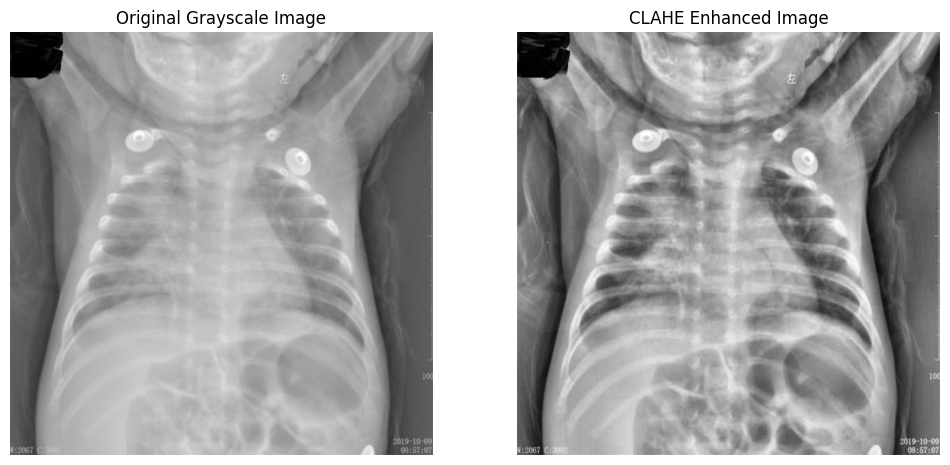

CLAHE-enhanced image saved successfully!


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = 'chest.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale

# Create a CLAHE object with a clip limit and tile grid size
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(image)

# Display the original and CLAHE-enhanced images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# CLAHE-enhanced image
ax[1].imshow(clahe_image, cmap='gray')
ax[1].set_title("CLAHE Enhanced Image")
ax[1].axis('off')

plt.show()

# Save the CLAHE-enhanced image
cv2.imwrite('clahe_chest.png', clahe_image)

print("CLAHE-enhanced image saved successfully!")


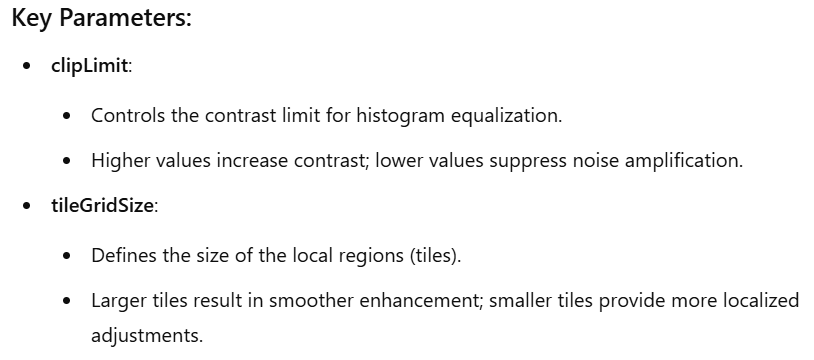

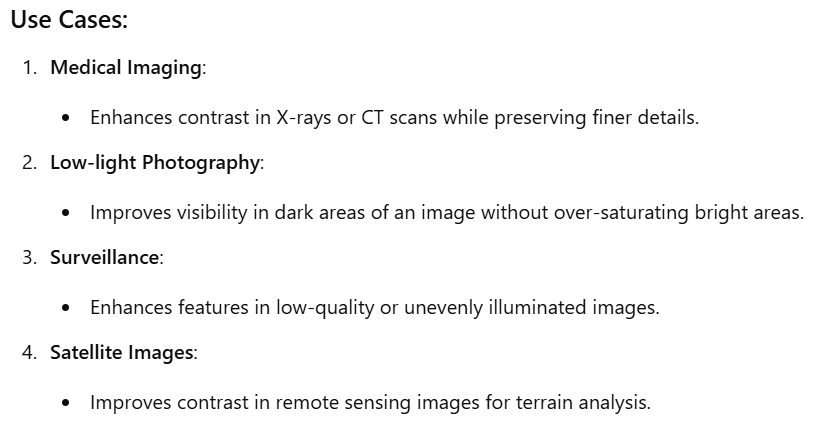

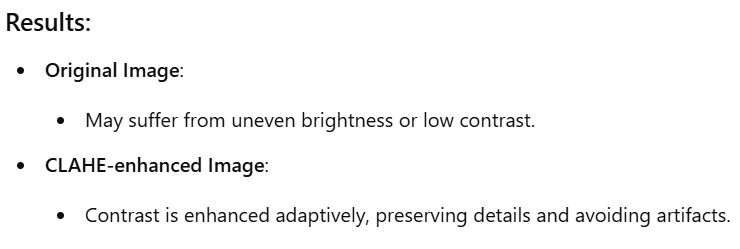

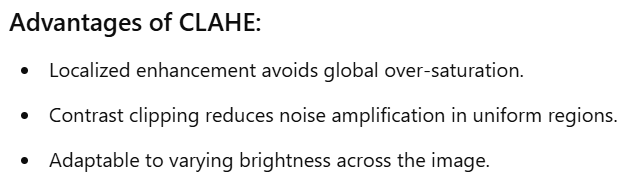

Contrast Stretching

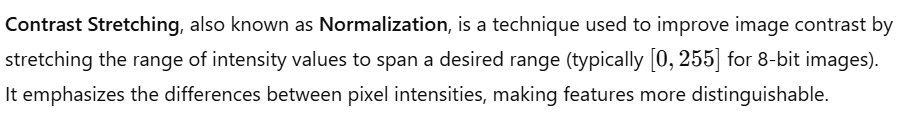

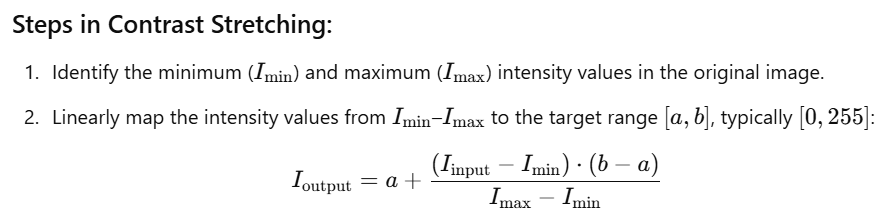

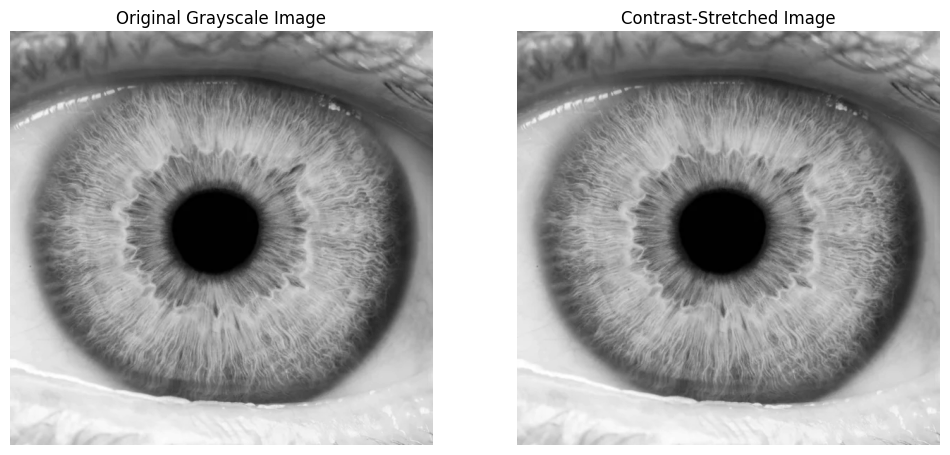

Contrast-stretched image saved successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'eye.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale

# Perform Contrast Stretching
# Get minimum and maximum intensity values
I_min, I_max = np.min(image), np.max(image)

# Define the target range [a, b]
a, b = 0, 255

# Apply contrast stretching formula
stretched_image = ((image - I_min) / (I_max - I_min) * (b - a) + a).astype(np.uint8)

# Display the original and contrast-stretched images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# Contrast-stretched image
ax[1].imshow(stretched_image, cmap='gray')
ax[1].set_title("Contrast-Stretched Image")
ax[1].axis('off')

plt.show()

# Save the contrast-stretched image
cv2.imwrite('contrast_stretched_eye.jpg', stretched_image)

print("Contrast-stretched image saved successfully!")


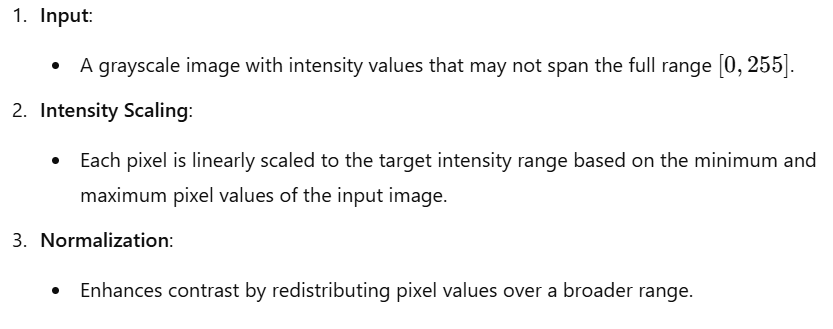

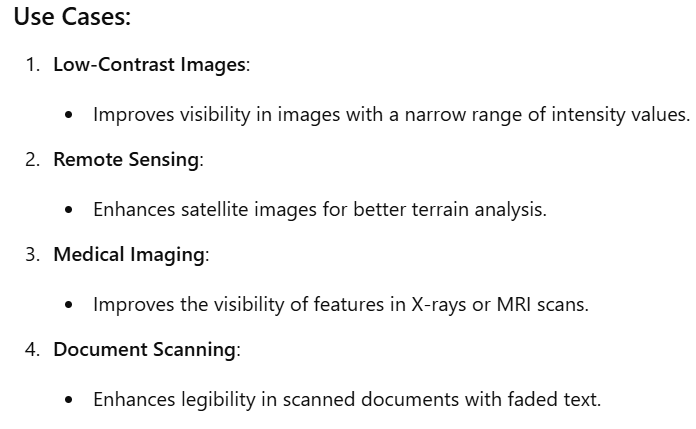

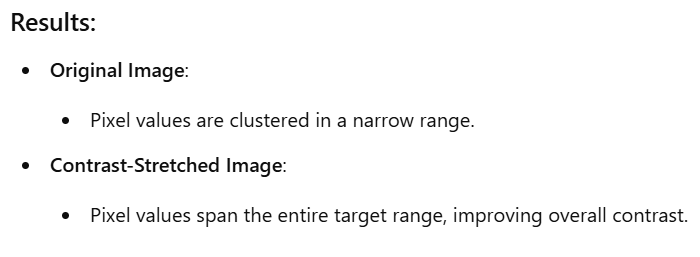

Sigmoid Correction

Sigmoid Correction is a non-linear image enhancement technique used to adjust the contrast of an image. It applies a sigmoid function to map pixel intensity values, emphasizing middle-intensity ranges while suppressing very bright or very dark regions. This method is particularly useful for highlighting subtle details.

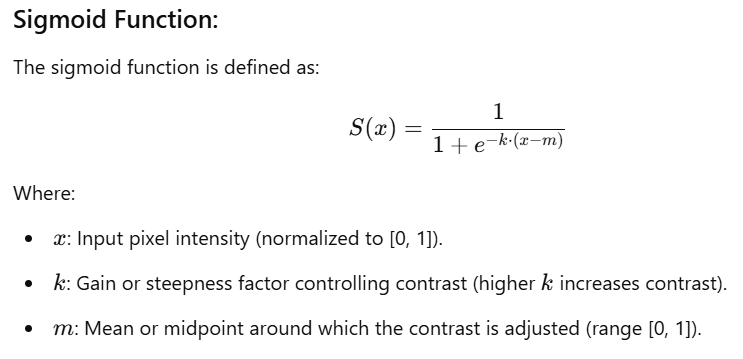

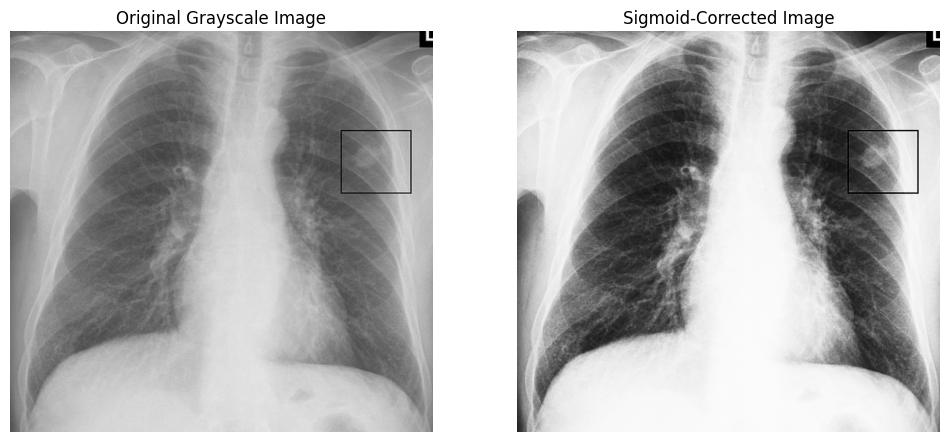

Sigmoid-corrected image saved successfully!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'lung-spots.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale

# Normalize the image to range [0, 1]
normalized_image = image / 255.0

# Parameters for the sigmoid function
k = 10  # Steepness (adjust for desired contrast)
m = 0.5  # Midpoint (adjust for brightness control)

# Apply Sigmoid Correction
sigmoid_corrected = 1 / (1 + np.exp(-k * (normalized_image - m)))

# Rescale back to [0, 255]
sigmoid_corrected = (sigmoid_corrected * 255).astype(np.uint8)

# Display the original and sigmoid-corrected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# Sigmoid-corrected image
ax[1].imshow(sigmoid_corrected, cmap='gray')
ax[1].set_title("Sigmoid-Corrected Image")
ax[1].axis('off')

plt.show()

# Save the sigmoid-corrected image
cv2.imwrite('sigmoid_corrected_lung-spots.jpg', sigmoid_corrected)

print("Sigmoid-corrected image saved successfully!")


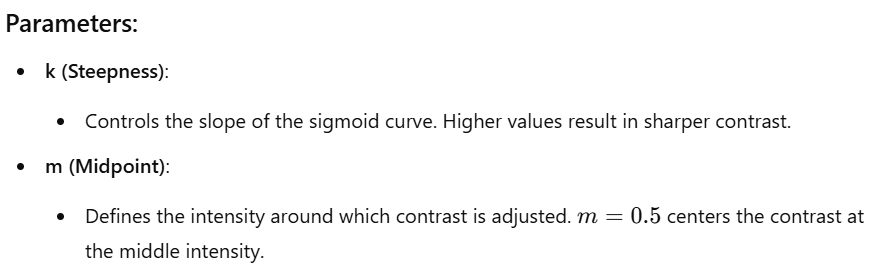

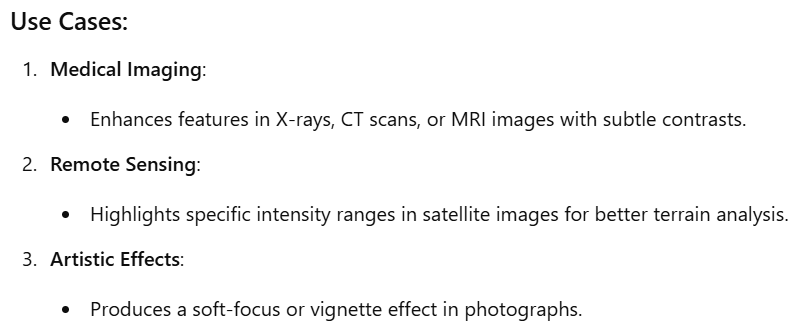

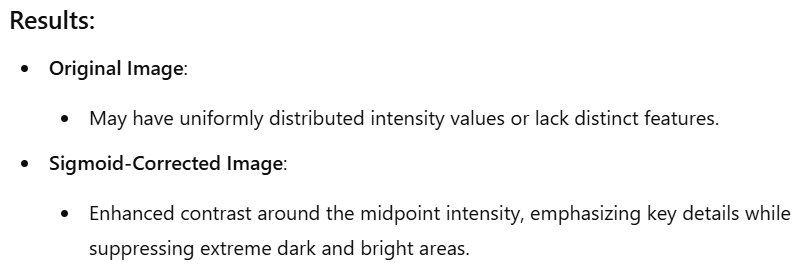

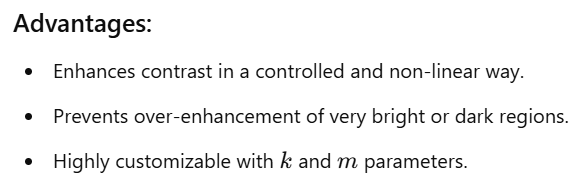

Local Contrast Normalization (LCN)

Local Contrast Normalization (LCN) enhances the local contrast of an image by normalizing pixel values relative to their surrounding neighborhood. This technique is particularly useful for highlighting local features while suppressing global intensity variations.

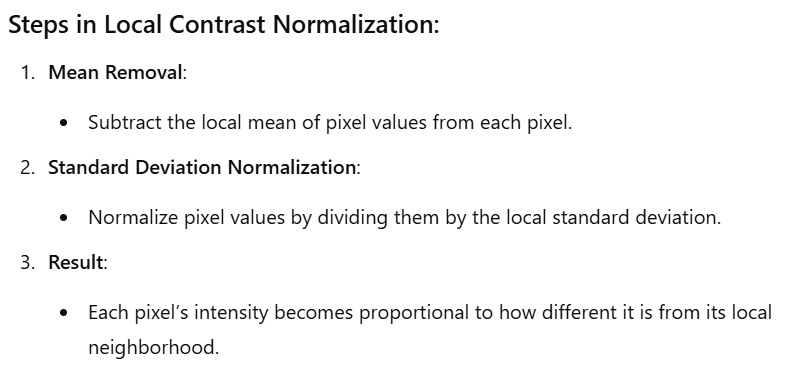

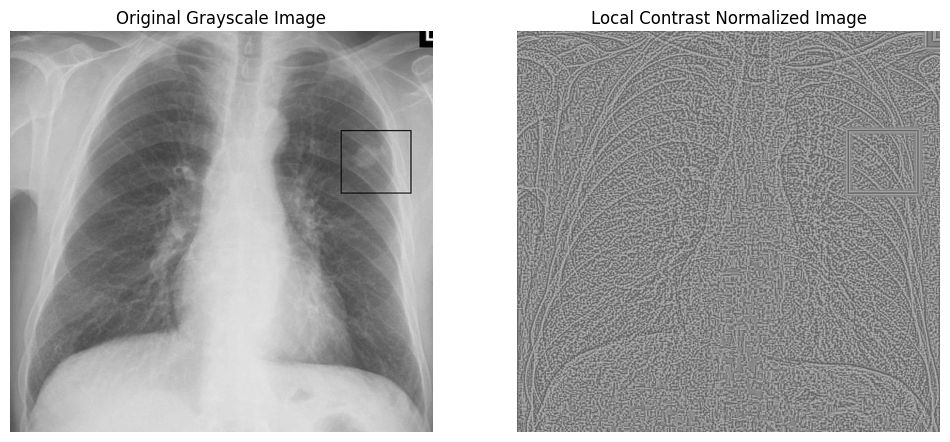

Local contrast-normalized image saved successfully!


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_contrast_normalization(image, kernel_size=15):
    """
    Apply Local Contrast Normalization to an image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        kernel_size (int): Size of the Gaussian kernel for local mean and std.

    Returns:
        numpy.ndarray: Locally contrast-normalized image.
    """
    # Convert image to float32
    img_float = image.astype(np.float32)

    # Compute the local mean using a Gaussian blur
    local_mean = cv2.GaussianBlur(img_float, (kernel_size, kernel_size), 0)

    # Compute the squared difference from the mean
    squared_diff = (img_float - local_mean) ** 2

    # Compute the local variance (mean of squared differences)
    local_variance = cv2.GaussianBlur(squared_diff, (kernel_size, kernel_size), 0)

    # Compute the local standard deviation
    local_std = np.sqrt(local_variance)

    # Avoid division by zero
    local_std[local_std < 1e-4] = 1e-4

    # Perform local contrast normalization
    normalized_image = (img_float - local_mean) / local_std

    # Scale to 0-255 and convert to uint8
    normalized_image = cv2.normalize(normalized_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return normalized_image

# Read the image
image_path = 'lung-spots.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Local Contrast Normalization
lcn_image = local_contrast_normalization(image)

# Display the original and normalized images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off')

# Locally contrast-normalized image
ax[1].imshow(lcn_image, cmap='gray')
ax[1].set_title("Local Contrast Normalized Image")
ax[1].axis('off')

plt.show()

# Save the LCN image
cv2.imwrite('local_contrast_normalized_lung-spots.jpg', lcn_image)

print("Local contrast-normalized image saved successfully!")


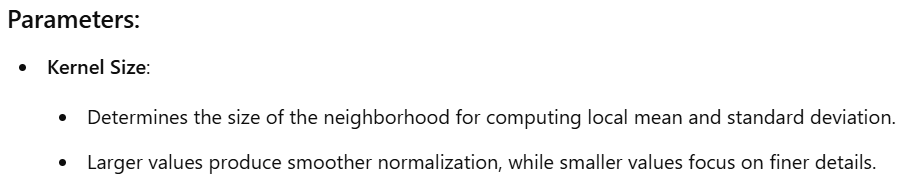

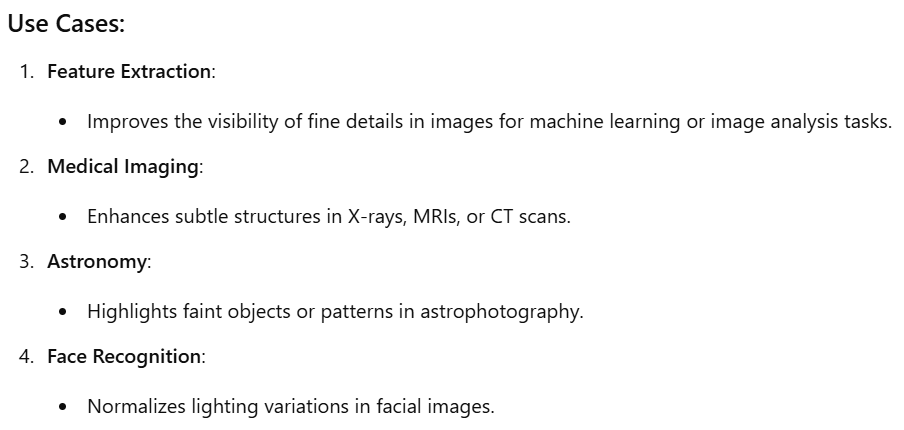

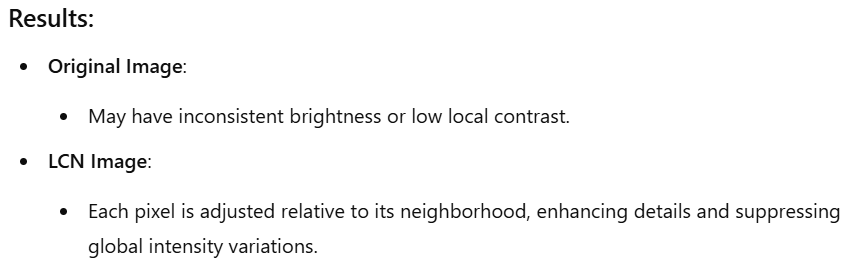

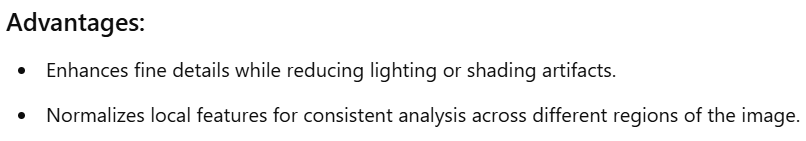